# hodgkin–huxley model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Define the constants and the time step of ODE

In [2]:
dt = 0.01      # time step
T = 5000       # total running step
C_m = 1.       # membrane capacitance (microF/cm**2)
G_k = 40.      # max K conductance (mS/cm**2)
G_l = 0.24     # max leak onductance (mS/cm**2)
G_na = 120.    # max Na conductance (mS/cm**2)
V_k = -12.0    # K reversal potential (mV)
V_l = 10.613   # leak potential (mV)
V_na = 115.    # Na reversal potential (mV)

4 eqs of Hodgkin-Huxley model  
* $C_M\displaystyle \frac{dV}{dt}=-g_{Na}(V-V_{Na})-g_k(V-V_K)-g_l(V-V_l)+I$ ($V$: Membrane Potential)  
* $\displaystyle \frac{dh}{dt}=\alpha_h{(V)}(1-h)-\beta_h(V)h$ ($h$: Na Inactivation)  
* $\displaystyle \frac{dm}{dt}=\alpha_m{(V)}(1-m)-\beta_m(V)m$ ($m$: Na Activation)  
* $\displaystyle \frac{dn}{dt}=\alpha_n{(V)}(1-n)-\beta_n(V)n$ ($n$: K Activation)  

In [3]:
def dv(v, param, dt):
    h, m, n, i = param
    gna = G_na * h * (m**3)
    gk = G_k * (n**4)
    gl = G_l
    ina = gna * (v - V_na)
    ik = gk * (v - V_k)
    il = gl * (v - V_l)
    return (- ina - ik - il + i) * dt / C_m

def dh(h, param, dt):
    v = param
    alph = 0.07 * np.exp(-v / 20)
    beth = 1. / (np.exp((30 - v) / 10) + 1)
    return (alph * (1 - h) - beth * h) * dt

def dm(m, param, dt):
    v = param
    alpm = 0.1 * (25 - v) / (np.exp((25 - v) / 10) - 1)
    betm = 4. * np.exp(-v / 18)
    return (alpm * (1 - m) - betm * m) * dt

def dn(n, param, dt):
    v = param
    alpn = 0.01 * (10 - v) / (np.exp((10 - v) / 10) - 1)
    betn = 0.125 * np.exp(-v / 80)
    return (alpn * (1 - n) - betn * n) * dt

Update the variables by Runge–Kutta method

In [4]:
def rk4(f, y, param, dt):
    k1 = f(y, param, dt)
    k2 = f(y + dt * k1 * 0.5, param, dt)
    k3 = f(y + dt * k2 * 0.5, param, dt)
    k4 = f(y + dt * k3, param, dt)
    return (k1 + 2*k2 + 2*k3 + k4) / 6

def update(v, h, m, n, i, dt):
    v += rk4(dv, v, (h, m, n, i), dt)
    h += rk4(dh, h, v, dt)
    m += rk4(dm, m, v, dt)
    n += rk4(dn, n, v, dt)
    return v, h, m, n

Initialize the variables

In [5]:
vt = 0. # membrane potential (mV)
mt = 0. # Na channel activation (dimensionless)
nt = 0. # K channel activation (dimensionless)
ht = 0. # Na channel inactivation (dimensionless)
# total membrane current (microA/cm**2)
it = [10] * 500 + [0] * (T - 500)

Define membrane current

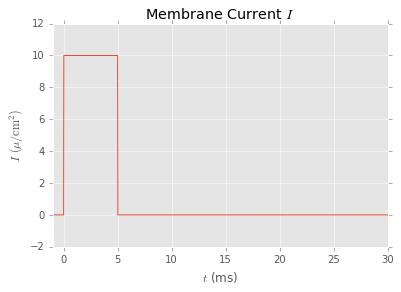

In [6]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$I$ $\mathrm{(\mu/cm^2)}$')
plt.xlim(-1, 30)
plt.ylim(-2, 12)
xticks = [x * dt for x in range(-500, 0)] + [x * dt for x in range(T)]
plt.plot(xticks, [0]*500 + it)
plt.title('Membrane Current $I$')
plt.savefig('1current.png', dpi=144)

Get the values in each time step

In [7]:
vts, hts, mts, nts = ([] for i in range(4))
for t in range(int(100 // dt)):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=0, dt=dt)
    # dispose of the results for 100 (ms)
for t in range(T):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=it[t], dt=dt)
    vts.append(vt)
    hts.append(ht)
    mts.append(mt)
    nts.append(nt)

Membrane potential

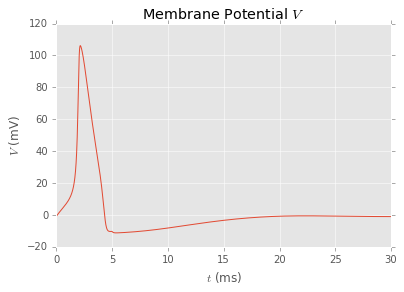

In [8]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$V$ (mV)')
plt.xlim(0, 30)
plt.ylim(-20, 120)
xticks = [x * dt for x in range(T)]
plt.plot(xticks, vts)
plt.title('Membrane Potential $V$')
#plt.savefig('1potential.png', dpi=144)

Each channel activation

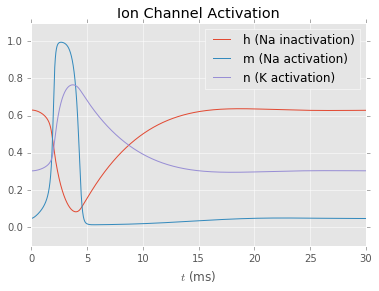

In [9]:
plt.xlabel('$t$ (ms)')
plt.xlim(0, 30)
plt.ylim(-0.1, 1.1)
xticks = [x * dt for x in range(T)]
plt.plot(xticks, hts)
plt.plot(xticks, mts)
plt.plot(xticks, nts)
plt.legend(['h (Na inactivation)', 'm (Na activation)',
            'n (K activation)'], bbox_to_anchor=(1, 1), framealpha=1)
plt.title('Ion Channel Activation')
#plt.savefig('1actv.png', dpi=144)

## Electrical Bursting

In [10]:
vt = mt = nt = ht = 0.
it = [10] * T
vts, hts, mts, nts = ([] for i in range(4))
for t in range(int(100 // dt)):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=0, dt=dt)
for t in range(T):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=it[t], dt=dt)
    vts.append(vt)
    hts.append(ht)
    mts.append(mt)
    nts.append(nt)

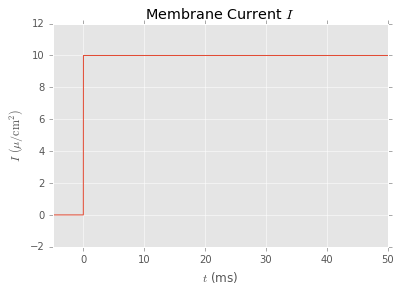

In [11]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$I$ $\mathrm{(\mu/cm^2)}$')
plt.xlim(-5, 50)
plt.ylim(-2, 12)
xticks = [x * dt for x in range(-500, 0)] + [x * dt for x in range(T)]
plt.plot(xticks, [0]*500 + it)
plt.title('Membrane Current $I$')
#plt.savefig('2current.png', dpi=144)

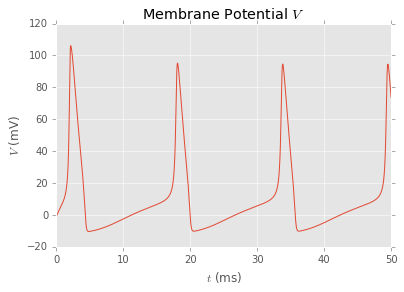

In [12]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$V$ (mV)')
plt.xlim(0, 50)
plt.ylim(-20, 120)
xticks = [x * dt for x in range(T)]
plt.plot(xticks, vts)
plt.title('Membrane Potential $V$')
#plt.savefig('2potential.png', dpi=144)

## Refractory Period

In [13]:
vt = mt = nt = ht = 0.
it = ([10] * 200 + [0] * 800) * (T // 1000)
vts, hts, mts, nts = ([] for i in range(4))
for t in range(int(100 / dt)):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=0, dt=dt)
for t in range(T):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=it[t], dt=dt)
    vts.append(vt)
    hts.append(ht)
    mts.append(mt)
    nts.append(nt)

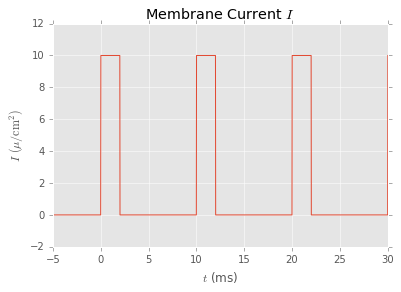

In [14]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$I$ $\mathrm{(\mu/cm^2)}$')
plt.xlim(-5, 30)
plt.ylim(-2, 12)
xticks = [x * dt for x in range(-500, 0)] + [x * dt for x in range(T)]
plt.plot(xticks, [0]*500 + it)
plt.title('Membrane Current $I$')
#plt.savefig('3current.png', dpi=144)

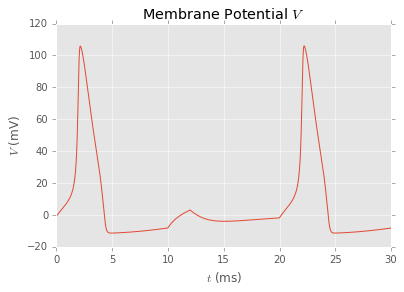

In [15]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$V$ (mV)')
plt.xlim(0, 30)
plt.ylim(-20, 120)
xticks = [x * dt for x in range(T)]
plt.plot(xticks, vts)
plt.title('Membrane Potential $V$')
#plt.savefig('3potential.png', dpi=144)

## Noise Resistance

In [16]:
vt = mt = nt = ht = 0.
it = [np.random.normal() for i in range(T)]
vts, hts, mts, nts = ([] for i in range(4))
for t in range(int(100 / dt)):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=0, dt=dt)
for t in range(T):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=it[t], dt=dt)
    vts.append(vt)
    hts.append(ht)
    mts.append(mt)
    nts.append(nt)

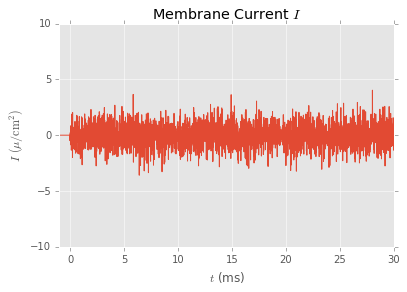

In [17]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$I$ $\mathrm{(\mu/cm^2)}$')
plt.xlim(-1, 30)
plt.ylim(-10, 10)
xticks = [x * dt for x in range(-500, 0)] + [x * dt for x in range(T)]
plt.plot(xticks, [0]*500 + it)
plt.title('Membrane Current $I$')
#plt.savefig('7current.png', dpi=144)

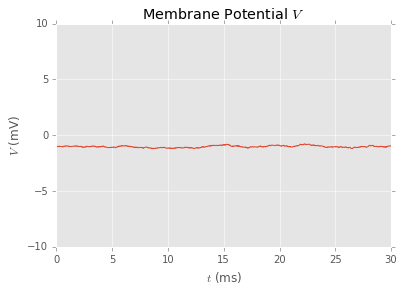

In [18]:
plt.xlabel('$t$ (ms)')
plt.ylabel('$V$ (mV)')
plt.xlim(0, 30)
plt.ylim(-10, 10)
xticks = [x * dt for x in range(T)]
plt.plot(xticks, vts)
plt.title('Membrane Potential $V$')
#plt.savefig('7potential.png', dpi=144)

## Analysis in m-v phase plane

In [19]:
vt = mt = nt = ht = 0.
it = [10] * 500 + [0] * (T - 500)
vts, hts, mts, nts = ([] for i in range(4))
for t in range(int(100 / dt)):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=0, dt=dt)
for t in range(T):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=it[t], dt=dt)
    vts.append(vt)
    hts.append(ht)
    mts.append(mt)
    nts.append(nt)

In [20]:
def m_nullcline(v):
    alpm = 0.1 * (25 - v) / (np.exp((25 - v) / 10) - 1)
    betm = 4. * np.exp(-v / 18)
    m = alpm / (alpm + betm)
    return m

mnc_vs = [x * 0.1 for x in range(-200, 249)] + [x * 0.1 for x in range(251, 1400)]
mnc_ms = [m_nullcline(v) for v in mnc_vs] 

In [21]:
def v_nullcline(m, n, h, i):
    gna = G_na * h * (m**3)
    gk = G_k * (n**4)
    gl = G_l
    v = (gna * V_na + gk * V_k + gl * V_l + i) / (gna + gk + gl)
    return v

p1 = 2500
p2 = 250
p3 = 300
p4 = 400
vnc_ms = [x * 0.001 for x in range(0, 1400)]
vnc_vs1 = [v_nullcline(m, nts[p1], hts[p1], it[p1]) for m in vnc_ms] 
vnc_vs2 = [v_nullcline(m, nts[p2], hts[p2], it[p2]) for m in vnc_ms] 
vnc_vs3 = [v_nullcline(m, nts[p3], hts[p3], it[p3]) for m in vnc_ms] 
vnc_vs4 = [v_nullcline(m, nts[p4], hts[p4], it[p4]) for m in vnc_ms] 

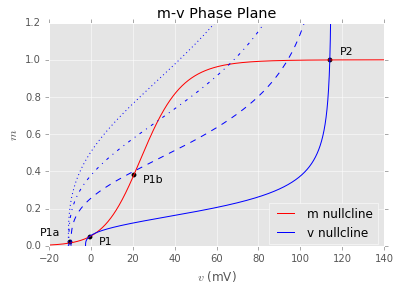

In [22]:
plt.plot(mnc_vs, mnc_ms, color='r')
plt.plot(vnc_vs1, vnc_ms, color='b')
plt.plot(vnc_vs2, vnc_ms, color='b', linestyle='--')
plt.plot(vnc_vs3, vnc_ms, color='b', linestyle='-.')
plt.plot(vnc_vs4, vnc_ms, color='b', linestyle=':')
plt.xlabel('$v$ (mV)')
plt.ylabel('$m$')
plt.xlim(-20, 140)
plt.ylim(0, 1.2)
plt.legend(['m nullcline', 'v nullcline'], 
           bbox_to_anchor=(1, 0.22), framealpha=1)
# fixed point
plt.scatter([-0.732, ], [0.0486, ], 18, color='k', marker='o')
plt.annotate('P1', xy=(-0.732, 0.0486), xycoords='data',
             xytext=(+9, -8), textcoords='offset points', fontsize=11)
plt.scatter([114, ], [1, ], 18, color='k', marker='o')
plt.annotate('P2', xy=(114, 1), xycoords='data',
             xytext=(+10, +5), textcoords='offset points', fontsize=11)
plt.scatter([-10, ], [0.02, ], 18, color='k', marker='o')
plt.annotate('P1a', xy=(-10, 0.02), xycoords='data',
             xytext=(-30, +7), textcoords='offset points', fontsize=11)
plt.scatter([20.5, ], [0.38, ], 18, color='k', marker='o')
plt.annotate('P1b', xy=(20.5, 0.38), xycoords='data',
             xytext=(+9, -7), textcoords='offset points', fontsize=11)
plt.title('m-v Phase Plane')
#plt.savefig('4nullcline.png', dpi=144)

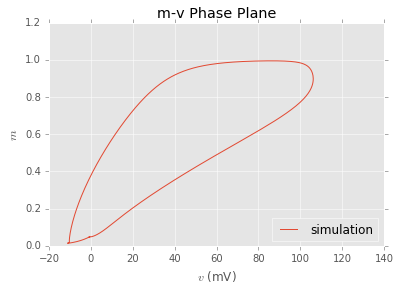

In [23]:
plt.plot(vts[:2500], mts[:2500])
plt.xlabel('$v$ (mV)')
plt.ylabel('$m$')
plt.xlim(-20, 140)
plt.ylim(0, 1.2)
plt.legend(['simulation'], 
           bbox_to_anchor=(1, 0.15), framealpha=1)
plt.title('m-v Phase Plane')
#plt.savefig('4m-v.png', dpi=144)

## Analysis in n - v phase plane

In [24]:
vt = mt = nt = ht = 0.
it = [10] * 500 + [0] * (T - 500)
vts, hts, mts, nts = ([] for i in range(4))
for t in range(int(100 / dt)):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=0, dt=dt)
for t in range(T):
    vt, ht, mt, nt = update(v=vt, h=ht, m=mt, n=nt, i=it[t], dt=dt)
    vts.append(vt)
    hts.append(ht)
    mts.append(mt)
    nts.append(nt)

In [25]:
def n_nullcline(v):
    alpn = 0.01 * (10 - v) / (np.exp((10 - v) / 10) - 1)
    betn = 0.125 * np.exp(-v / 80)
    n = alpn / (alpn + betn)
    return n

nnc_vs = [x * 0.1 for x in range(-200, 99)] + [x * 0.1 for x in range(101, 1400)]
nnc_ns = [n_nullcline(v) for v in nnc_vs] 

In [26]:
def v_nullcline(n, m):
    i = 0.
    h = 0.8 - n
    gna = G_na * h * (m**3)
    gk = G_k * (n**4)
    gl = G_l
    v = (gna * V_na + gk * V_k + gl * V_l + i) / (gna + gk + gl)
    return v

vnc_ns = [x * 0.001 for x in range(0, 1000)]
vnc_vs1 = [v_nullcline(n, mts[2500]) for n in vnc_ns] 
vnc_vs2 = [v_nullcline(n, mts[150]) for n in vnc_ns] 
vnc_vs3 = [v_nullcline(n, mts[200]) for n in vnc_ns] 
vnc_vs4 = [v_nullcline(n, mts[250]) for n in vnc_ns] 

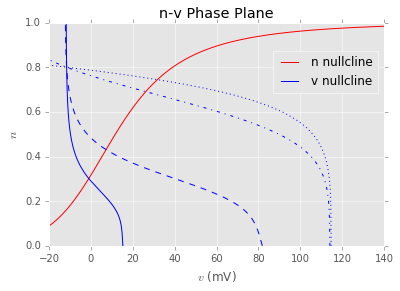

In [27]:
plt.plot(nnc_vs, nnc_ns, color='r')
plt.plot(vnc_vs1, vnc_ns, color='b')
plt.plot(vnc_vs2, vnc_ns, color='b', linestyle='--')
plt.plot(vnc_vs3, vnc_ns, color='b', linestyle='-.')
plt.plot(vnc_vs4, vnc_ns, color='b', linestyle=':')
plt.xlabel('$v$ (mV)')
plt.ylabel('$n$')
plt.xlim(-20, 140)
plt.ylim(0, 1)
plt.legend(['n nullcline', 'v nullcline'], 
           bbox_to_anchor=(1, 0.9), framealpha=1)
plt.title('n-v Phase Plane')
#plt.savefig('5nullcline.png', dpi=144)

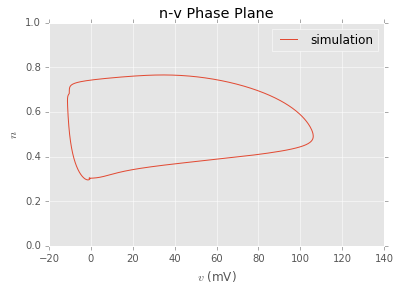

In [28]:
plt.plot(vts[:2500], nts[:2500])
plt.xlabel('$v$ (mV)')
plt.ylabel('$n$')
plt.xlim(-20, 140)
plt.ylim(0, 1)
plt.legend(['simulation'], 
           bbox_to_anchor=(1, 1), framealpha=1)
plt.title('n-v Phase Plane')
#plt.savefig('6n-v.png', dpi=144)